In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [2]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).count()
day_average.head()


,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


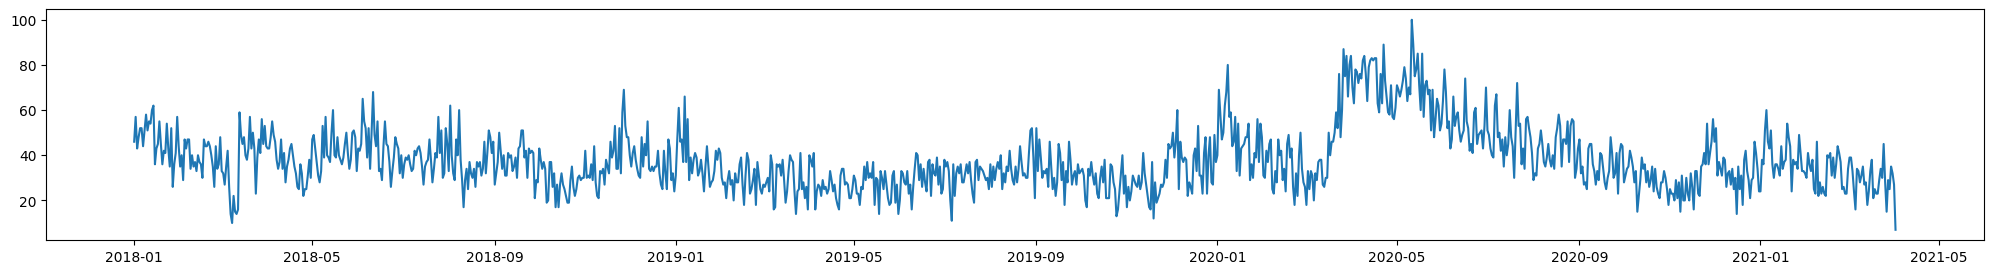

In [28]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

### Rating average by week

In [36]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week'])

plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average['Rating'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

<Figure size 2500x300 with 0 Axes>

### Average rating by month

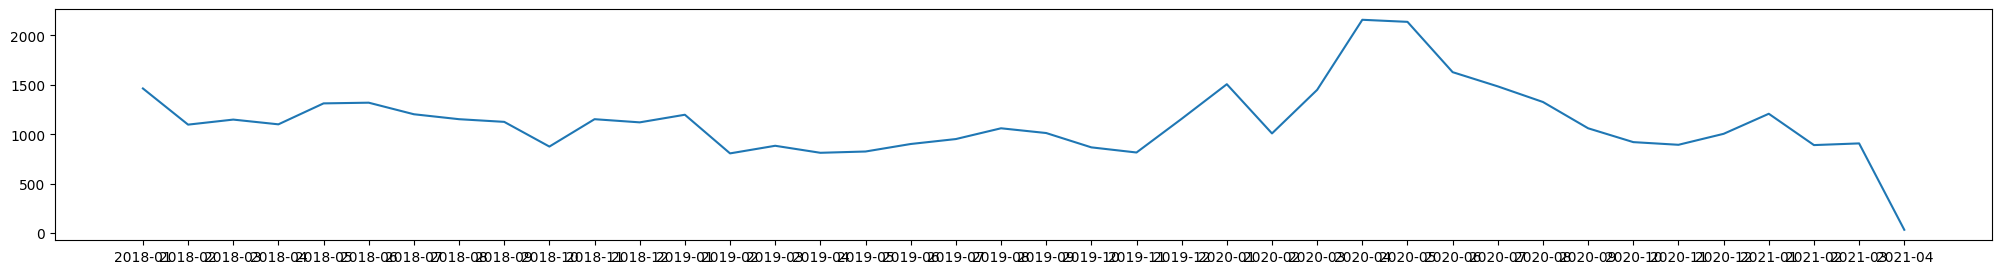

In [18]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).count()

plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])

### Average rating by month by course 

<Axes: xlabel='Month'>

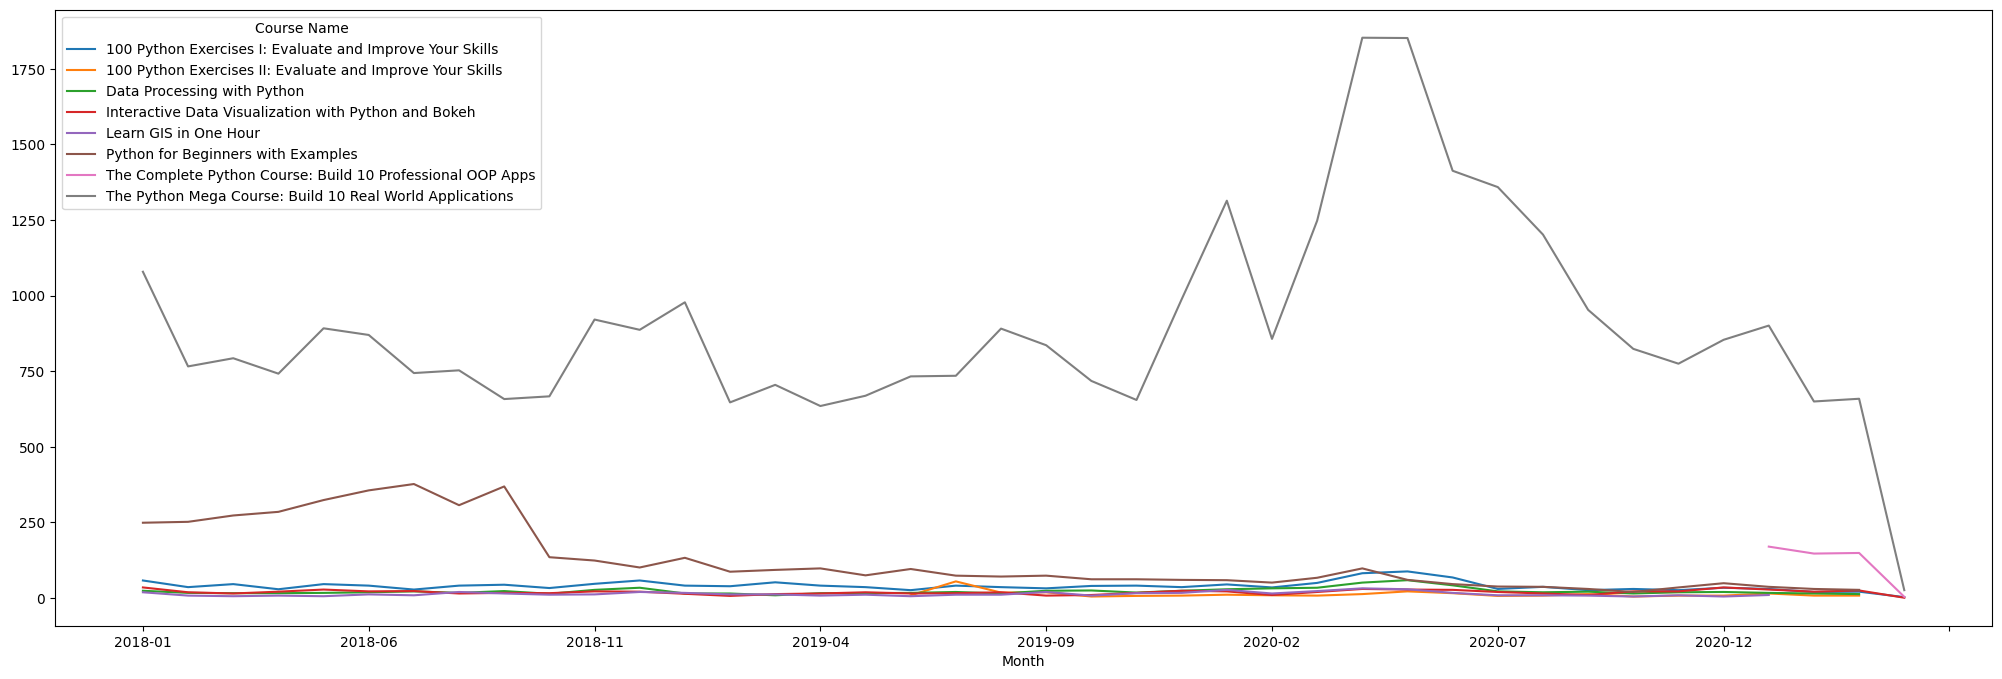

In [21]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()
month_average_crs.plot(figsize=(25, 8))

### What day are people the happiest?

In [26]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
data

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

plt.figure(figsize=[15,3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

,Course Name,Timestamp,Rating,Comment,Day,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-04,Friday,5
...,...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-01,Monday,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-01,Monday,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-01,Monday,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-01,Monday,1


### Number of ratings by course

In [35]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x20c96d39940>,
 [Text(1.093204501902345, 0.12208159984389857, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539490063081, 0.26357989832654555, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237467267586, 0.3482339511976009, 'Data Processing with Python'),
  Text(0.9969710233917297, 0.4648104759116852, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514243624985, 0.5509973551382421, 'Learn GIS in One Hour'),
  Text(0.6871673546107159, 0.8589534485391574, 'Python for Beginners with Examples'),
  Text(0.3307029829407597, 1.0491117848323332, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.876275637740144, -0.6649368441461971, 'The Python Mega Course: Build 10 Real World Applications')])

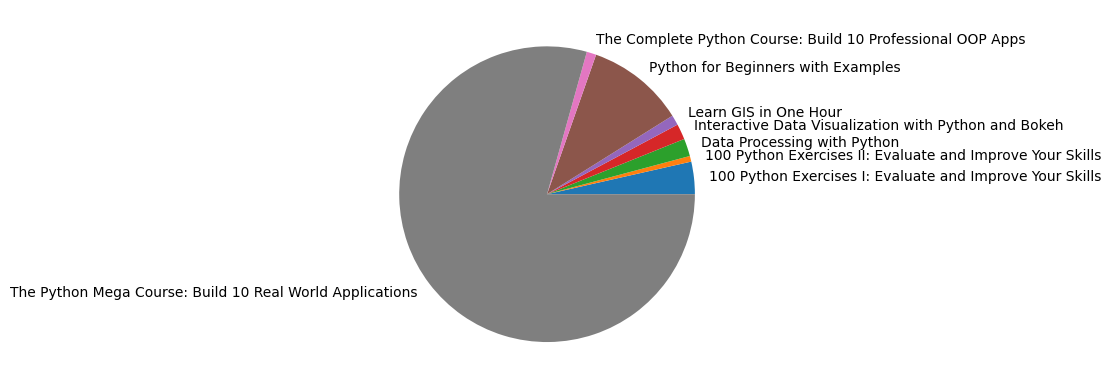

In [38]:
plt.pie(share, labels=share.index)